In [ ]:
现在我们有北上广深和沈阳五个城市空气质量数据，请绘制出五个城市的PM2.5随时间的变化情况
观察这组数据中的时间结构，并不是字符串，这个时候我们应该怎么办？_

datetime
2010-01-01     71.627586
2010-01-08     69.910714
2010-01-15    163.654762
2010-01-22     68.069307
2010-01-29     53.583333
                 ...    
2015-11-27    242.642857
2015-12-04    145.437500
2015-12-11     88.750000
2015-12-18    204.139241
2015-12-25    209.244048
Freq: 7D, Name: PM_US Post, Length: 313, dtype: float64


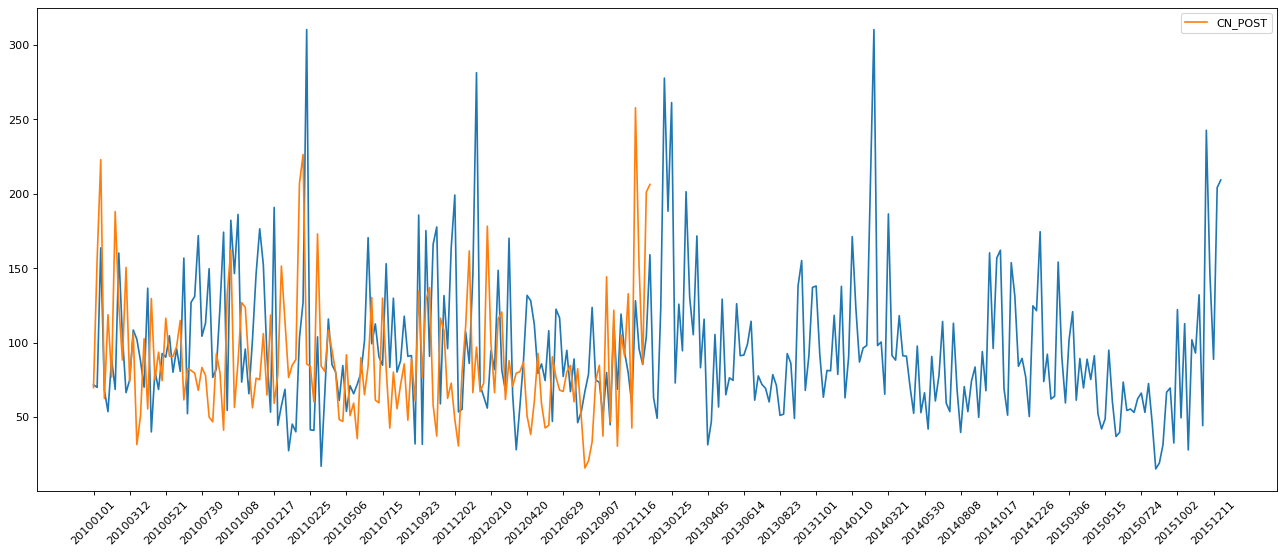

In [30]:
# coding=utf-8
import pandas as pd
import matplotlib.pyplot as plt

file_path = './BeijingPM20100101_20151231.csv'
df = pd.read_csv(file_path)
   # print(df.head())
   # print(df.info())

### 把分开的时间字符串通过PeriodIndex的方法转化为pandas的时间类型   设置时间
period = pd.PeriodIndex(year=df['year'],month=df['month'],day=df['day'],hour=df['hour'],freq='H')
   # print(period)
   # print(type(period))
df['datetime'] = period
   # print(df.head(10))

### 把datetime设置为索引
df.set_index('datetime',inplace=True)

# 进行降采样  7D是一周
df = df.resample('7D').mean()
# print(df.head())


### 处理缺失数据
### 变成平均值或者删除缺失数据   看看那个更好
### 1.删除缺失数据
print(df['PM_US Post'])
data = df['PM_US Post'].dropna()
data_china = df['PM_Dongsi'].dropna()

   # 画图
_x = data.index
_x = [i.strftime('%Y%m%d') for i in _x]
_x_china = [i.strftime('%Y%m%d') for i in data_china.index]
_y = data.values
_y_china = data_china.values

plt.figure(figsize=(20,8),dpi=80)

plt.plot(range(len(_x)),_y)
plt.plot(range(len(_x_china)),_y_china,label='CN_POST')

plt.xticks(range(0,len(_x),10),list(_x)[::10],rotation=45)

plt.legend(loc='best')

plt.show()